# Cartesian Genetic Programming

## Parameters
1. **λ**: number of individuals per generation (population).
2. **Mutation rate**: % of the individual that will change.
3. **Cromossome size**: number of operations that a individual will have.

## Libraries

In [1]:
from math import sqrt
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Operations

In [2]:
def binarize_image(image, type='normal'):
    if type == 'otsu':
        _, image = cv2.threshold(image.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    elif type == 'normal':
        _, image = cv2.threshold(image.astype(np.uint8), 200, 255, cv2.THRESH_BINARY)
    else:
        print('Tipo de threshold inválido')
        return
    return image // 255
    
def and_op(image1, image2):
    return np.logical_and(image1, image2).astype(np.uint8)

def or_op(image1, image2):
    return np.logical_or(image1, image2).astype(np.uint8)

def xor_op(image1, image2):
    return np.logical_xor(image1, image2).astype(np.uint8)

def not_op(image):
    return np.logical_not(image).astype(np.uint8)

def erode_op(image, kernel):
    return cv2.erode(image, kernel, iterations=1)

def dilate_op(image, kernel):
    return cv2.dilate(image, kernel, iterations=1)

def custom_len(arr):
    return sum(1 for x in arr if x is not None)

## Regular Kernels

In [3]:
regular_kernels_3x3 = np.array([
    np.array([[1,1,1],[1,1,1],[1,1,1]], dtype=np.uint8),
    np.array([[0,1,0],[1,1,1],[0,1,0]], dtype=np.uint8),
    np.array([[1,0,1],[0,1,0],[1,0,1]], dtype=np.uint8),
    np.array([[0,0,1],[0,1,0],[1,0,0]], dtype=np.uint8),
    np.array([[1,0,0],[0,1,0],[0,0,1]], dtype=np.uint8),
    np.array([[0,1,0],[0,1,0],[0,1,0]], dtype=np.uint8),
    np.array([[0,0,0],[1,1,1],[0,0,0]], dtype=np.uint8),
    np.array([[1,1,1],[0,0,0],[0,0,0]], dtype=np.uint8),
    np.array([[0,0,0],[0,0,0],[1,1,1]], dtype=np.uint8)
])

regular_kernels_5x5 = np.array([
    np.array(np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]], dtype=np.uint8)),
    np.array(np.array([[0,0,1,0,0],[0,0,1,0,0],[1,1,1,1,1],[0,0,1,0,0],[0,0,1,0,0]], dtype=np.uint8)),
    np.array(np.array([[1,0,0,0,1],[0,1,0,1,0],[0,0,1,0,0],[0,1,0,1,0],[1,0,0,0,1]], dtype=np.uint8)),
    np.array(np.array([[0,0,0,0,1],[0,0,0,1,0],[0,0,1,0,0],[0,1,0,0,0],[1,0,0,0,0]], dtype=np.uint8)),
    np.array(np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]], dtype=np.uint8)),
    np.array(np.array([[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0]], dtype=np.uint8)),
    np.array(np.array([[0,0,0,0,0],[0,0,0,0,0],[1,1,1,1,1],[0,0,0,0,0],[0,0,0,0,0]], dtype=np.uint8)),
    np.array(np.array([[0,0,0,0,0],[0,1,1,1,0],[0,1,1,1,0],[0,1,1,1,0],[0,0,0,0,0]], dtype=np.uint8)),
    np.array(np.array([[0,0,1,0,0],[0,1,1,1,0],[1,1,1,1,1],[0,1,1,1,0],[0,0,1,0,0]], dtype=np.uint8)),
])

regular_kernels_7x7 = np.array([
    np.array(np.array([[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],[1,1,1,1,1,1,1],
                       [1,1,1,1,1,1,1], [1,1,1,1,1,1,1]], dtype=np.uint8)),
    np.array(np.array([[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[1,1,1,1,1,1,1],[0,0,0,1,0,0,0],
                       [0,0,0,1,0,0,0], [0,0,0,1,0,0,0]], dtype=np.uint8)),
    np.array(np.array([[1,0,0,0,0,0,1],[0,1,0,0,0,1,0],[0,0,1,0,1,0,0],[0,0,0,1,0,0,0],[0,0,1,0,1,0,0],
                       [0,1,0,0,0,1,0], [1,0,0,0,0,0,1]], dtype=np.uint8)),
    np.array(np.array([[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],[0,0,0,1,0,0,0],
                       [0,0,0,1,0,0,0], [0,0,0,1,0,0,0]], dtype=np.uint8)),
    np.array(np.array([[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[1,1,1,1,1,1,1],[0,0,0,0,0,0,0],
                       [0,0,0,0,0,0,0], [0,0,0,0,0,0,0]], dtype=np.uint8)),
    np.array(np.array([[0,0,0,0,0,0,1],[0,0,0,0,0,1,0],[0,0,0,0,1,0,0],[0,0,0,1,0,0,0],[0,0,1,0,0,0,0],
                       [0,1,0,0,0,0,0], [1,0,0,0,0,0,0]], dtype=np.uint8)),
    np.array(np.array([[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0],[0,0,0,0,1,0,0],
                       [0,0,0,0,0,1,0], [0,0,0,0,0,0,1]], dtype=np.uint8)),
    np.array(np.array([[0,0,0,1,0,0,0],[0,0,1,1,1,0,0],[0,1,1,1,1,1,0],[1,1,1,1,1,1,1],[0,1,1,1,1,1,0],
                       [0,0,1,1,1,0,0], [0,0,0,1,0,0,0]], dtype=np.uint8)),
    np.array(np.array([[1,1,1,1,1,1,1],[0,1,1,1,1,1,0],[0,0,1,1,1,0,0],[0,0,0,1,0,0,0],[0,0,1,1,1,0,0],
                       [0,1,1,1,1,1,0], [1,1,1,1,1,1,1]], dtype=np.uint8)),
])

## Irregular Kernels

In [4]:
np.random.seed(42)

irregular_kernels_3x3 = np.empty(shape=9,dtype=object)
irregular_kernels_5x5 = np.empty(shape=9,dtype=object)
irregular_kernels_7x7 = np.empty(shape=9,dtype=object)

for i in range(9):
    irregular_kernels_3x3[i] = np.random.randint(2, size=(3, 3))
    irregular_kernels_5x5[i] = np.random.randint(2, size=(5, 5))
    irregular_kernels_7x7[i] = np.random.randint(2, size=(7, 7))

In [5]:
irregular_kernels_3x3[0]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]])

## All Kernels

In [6]:
all_kernels = regular_kernels_3x3.tolist() + \
              regular_kernels_5x5.tolist() + \
              regular_kernels_7x7.tolist() + \
              irregular_kernels_3x3.tolist() + \
              irregular_kernels_5x5.tolist() + \
              irregular_kernels_7x7.tolist()
for idx, element in enumerate(all_kernels):
    all_kernels[idx] = np.array(element, dtype=np.uint8)
all_kernels = np.array(all_kernels, dtype=object)
    

In [7]:
len(all_kernels)

54

## Fitness Functions

In [8]:
def image_mul(image1, image2):
        if (len(image1) == len(image2)):
            N = len(image1)
        else:
            print('Imagens não compatíveis: Tamanhos diferentes')
            return
        image1 = image1.astype(np.uint8)
        image2 = image2.astype(np.uint8)
        _, image1 = cv2.threshold(image1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        _, image2 = cv2.threshold(image2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        image1 = image1 // 255
        image2 = image2 // 255
        sum = 0
        for i in range(image1.shape[0]):
            for j in range(image1.shape[1]):
                sum += image1[i][j] * image2[i][j]
        return sum*(1/N)/(1/N)



def fit_a(image2, image1):
    return (image_mul(image1, image2))/((sqrt(image_mul(image1, image1)))*(sqrt(image_mul(image2, image2))))


In [9]:
def fit_b(image1, image2):
        TP=0
        TN=0
        FP=0
        FN=0
        if (len(image1) == len(image2)):
            N = len(image1)
        else:
            print('Imagens não compatíveis: Tamanhos diferentes')
            return
        
        image1 = image1.astype(np.uint8)
        image2 = image2.astype(np.uint8)

        # Smart threshold
        sum = 0
        for i in range(image1.shape[0]):
            for j in range(image1.shape[1]):
                if(image1[i][j] == 1 and image2[i][j] == 1):
                    TP+=1
                elif(image1[i][j] == 1 and image2[i][j] == 0):
                    FP+=1
                elif(image1[i][j] == 0 and image2[i][j] == 1):
                    FN+=1
                elif(image1[i][j] == 0 and image2[i][j] == 0):
                    TN+=1
        if (TP + FN == 0 or TN + FP == 0):
            SV = 1
            SP = 1
        else:
            SV = (TP)/(TP + FN)
            SP = (TN)/(TN + FP)

        return 1-((sqrt((1-SP)**2 + (1-SV)**2))/sqrt(2))

In [10]:
   def fit_pearson(image1, image2):
        return np.corrcoef((image1.ravel(),image2.ravel()))[0,1]

## Encoding:

- 1X: Functions
    - 11: AND
    - 12: OR
    - 13: XOR
    - 14: NOT
    - 15: DILATION
    - 16: EROSION

In [11]:
# First generation

def first_generation(chrom_len, pop_len, input):
    functions = [11,12,13,14,15,16]
    
    available_inputs = np.empty(shape=(chrom_len+1,),dtype=object)
    available_inputs[0] = input

    outputs = np.empty(shape=(pop_len,),dtype=object)
    
    chromossomes = np.empty(shape=(pop_len,),dtype=object)
    
    for k in range(pop_len):
        chromossome = []
        aux = [-1,-1,-1]
        
        for i in range(0,chrom_len):
            chromossome.append(np.array(aux))
        chromossome = np.array(chromossome)
        for i in range(0,chrom_len):
            chromossome[i][2] = random.randint(11,16)
        
        for i in range(0, chrom_len):
            input1 = random.randint(0,min([i+1,custom_len(available_inputs)-1]))
            input2 = random.randint(0,min([i+1,custom_len(available_inputs)-1]))
            chromossome[i][0] = input1
            if (chromossome[i][2] == 11):
                chromossome[i][1] = input2
                available_inputs[i+1] = and_op(available_inputs[input1],available_inputs[input2]) 
            elif (chromossome[i][2] == 12):
                chromossome[i][1] = input2
                available_inputs[i+1] = or_op(available_inputs[input1],available_inputs[input2]) 
            elif (chromossome[i][2] == 13):
                chromossome[i][1] = input2
                available_inputs[i+1] = xor_op(available_inputs[input1],available_inputs[input2]) 
            elif (chromossome[i][2] == 14):
                available_inputs[i+1] = not_op(available_inputs[input1])
            elif (chromossome[i][2] == 15):
                input2 = random.randint(0,len(all_kernels)-1)
                chromossome[i][1] = input2
                available_inputs[i+1] = dilate_op(available_inputs[input1],all_kernels[input2])
            else:
                input2 = random.randint(0,len(all_kernels)-1)
                chromossome[i][1] = input2
                available_inputs[i+1] = erode_op(available_inputs[input1],all_kernels[input2])
        chromossomes[k] = np.array(chromossome)
        outputs[k] = available_inputs[-1]
        available_inputs = np.empty(shape=(chrom_len+1,),dtype=object)
        available_inputs[0] = input
    return chromossomes, outputs

In [12]:
def new_generation(parent, chrom_len, pop_len, mut_rate, input):
    functions = [11,12,13,14,15,16]
    available_inputs = np.empty(shape=(chrom_len+1,),dtype=object)
    available_inputs[0] = input

    outputs = np.empty(shape=(pop_len,),dtype=object)
    
    chromossomes = np.empty(shape=(pop_len,),dtype=object)
    
    for k in range(pop_len):
        chromossome = []
        aux = [-1,-1,-1]
        
        for i in range(0,chrom_len):
            chromossome.append(np.array(aux))
        chromossome = np.array(chromossome)
        
        
        for i in range(0, chrom_len):
            flag_kernel = True
            if (random.random() < mut_rate):
                input1 = random.randint(0,min([i+1,custom_len(available_inputs)-1]))
                input2 = random.randint(0,min([i+1,custom_len(available_inputs)-1]))
                chromossome[i][0] = input1
                chromossome[i][2] = functions[random.randint(0,5)]
            else:
                input1 = parent[i][0]
                input2 = parent[i][1]
                chromossome[i][2] = parent[i][2]
                chromossome[i][0] = input1
                #print(f"I1: {parent[i][0]} and I2: {parent[i][1]} and function {chromossome[i][2]}")
                flag_kernel = False
            
            if (chromossome[i][2] == 11):
                chromossome[i][1] = input2
                available_inputs[i+1] = and_op(available_inputs[input1],available_inputs[input2]) 
            elif (chromossome[i][2] == 12):
                chromossome[i][1] = input2
                available_inputs[i+1] = or_op(available_inputs[input1],available_inputs[input2]) 
            elif (chromossome[i][2] == 13):
                chromossome[i][1] = input2
                available_inputs[i+1] = xor_op(available_inputs[input1],available_inputs[input2]) 
            elif (chromossome[i][2] == 14):
                available_inputs[i+1] = not_op(available_inputs[input1])
            elif (chromossome[i][2] == 15):
                if flag_kernel:
                    input2 = random.randint(0,len(all_kernels)-1)
                chromossome[i][1] = input2
                available_inputs[i+1] = dilate_op(available_inputs[input1],all_kernels[input2])
            else:
                input2 = random.randint(0,len(all_kernels)-1)
                chromossome[i][1] = input2
                available_inputs[i+1] = erode_op(available_inputs[input1],all_kernels[input2])
        chromossomes[k] = np.array(chromossome)
        outputs[k] = available_inputs[-1]
        available_inputs = np.empty(shape=(chrom_len+1,),dtype=object)
        available_inputs[0] = input
    return chromossomes, outputs

In [13]:
# Validação em um pedaço da imagem

def validation(pop_len, outputs, output_img):
    best_gen_idx = 0
    best_gen_score = 0
    
    for k in range(pop_len):
        score = fit_pearson(outputs[k], output_img)
        if score > best_gen_score and score != 1.0:
            best_gen_score = score
            best_gen_idx = k
    return best_gen_score, best_gen_idx

In [14]:
def CGP(X_train, chrom_len, pop_len, epochs, mut_rate=0.1):
    population, outputs = first_generation(chrom_len, pop_len, X_train['input'][0])
    best_gen_score, best_gen_idx = validation(pop_len, outputs, X_train['output'][0])
    for i in range(X_train.shape[0]):
        print(f'======== IMAGE {i} ==========')
        for j in range(epochs):
            parent = population[best_gen_idx]
            population, outputs = new_generation(parent, chrom_len, pop_len, mut_rate, X_train['input'][i])
            best_gen_score, best_gen_idx = validation(pop_len, outputs, X_train['output'][i])
            print(f' Epoch {j}: score -> {best_gen_score}')
    
    return population[best_gen_idx], outputs[best_gen_idx], best_gen_score


In [15]:
CHROMOSSOME_LEN = 35
POPULATION_LEN = 90
EPOCHS = 350

In [16]:
def CGP_one(input, output, chrom_len, pop_len, epochs, mut_rate=0.1):
    population, outputs = first_generation(chrom_len, pop_len, input)
    best_gen_score, best_gen_idx = validation(pop_len, outputs, output)
    for i in range(epochs):
        parent = population[best_gen_idx]
        population, outputs = new_generation(parent, chrom_len, pop_len, mut_rate, input)
        best_gen_score, best_gen_idx = validation(pop_len, outputs, output)
        #print(f' Epoch {i}: score -> {best_gen_score}')
    
    return population[best_gen_idx], outputs[best_gen_idx], best_gen_score

In [17]:
from time import perf_counter

In [18]:
X_train = custom_set(['beam'])
#input_img = binarize_image(cv2.imread('./train/input/5.jpg')[:,:,0], 'otsu')
#output_img = binarize_image(cv2.imread('./train/output/note/5.jpg')[:,:,0], 'otsu')
time_start = perf_counter()
chromossome, output_, score = CGP(X_train, CHROMOSSOME_LEN, POPULATION_LEN, EPOCHS, 0.05)
time_end = perf_counter()

print(f'Tempo de treinamento da CGP: {time_end - time_start}s')

NameError: name 'custom_set' is not defined

In [ ]:
print(score)

In [ ]:
save_chromossome(chromossome, 'beam_90_35_005_350_final')

In [ ]:
plt.imshow(output_)
plt.show()

## Load and Save Chromossomes

In [19]:
def save_chromossome(chromossome, name):
    chromossome.tofile(f'{name}.dat')
    print(f'Chromossome {name} saved!')
    
def load_chromossome(name):
    c = np.fromfile(f'{name}.dat', dtype=int)
    final_array = []
    aux = []
    for i in range(len(c)):
        if (i+1) % 3 == 0 and i != 0:
            aux.append(c[i])
            final_array.append(np.array(aux))
            aux = []
        else:
            aux.append(c[i])
    return np.array(final_array)

In [20]:
def CGP_func_apply(input, chromossome):
    chrom_len = len(chromossome)
    available_inputs = np.empty(shape=(chrom_len+1,),dtype=object)
    available_inputs[0] = input
    
    for i in range(0, chrom_len):
        
        if (chromossome[i][2] == 11):
            available_inputs[i+1] = and_op(available_inputs[chromossome[i][0]],available_inputs[chromossome[i][1]]) 
        elif (chromossome[i][2] == 12):
            available_inputs[i+1] = or_op(available_inputs[chromossome[i][0]],available_inputs[chromossome[i][1]]) 
        elif (chromossome[i][2] == 13):
            available_inputs[i+1] = xor_op(available_inputs[chromossome[i][0]],available_inputs[chromossome[i][1]])  
        elif (chromossome[i][2] == 14):
            available_inputs[i+1] = not_op(available_inputs[chromossome[i][0]]) 
        elif (chromossome[i][2] == 15):
            available_inputs[i+1] = dilate_op(available_inputs[chromossome[i][0]],all_kernels[chromossome[i][1]])
        else:
            available_inputs[i+1] = erode_op(available_inputs[chromossome[i][0]],all_kernels[chromossome[i][1]])
        
    return available_inputs[-1]

In [ ]:
np.unique(CGP_func_apply(input, chromossome)) == np.unique(output)

In [ ]:
fit_pearson(output, CGP_func_apply(X_train['input'][13], chromossome))

In [ ]:
# Tempo de execução
start = perf_counter()
CGP_func_apply(X_train['input'][13], chromossome)
end = perf_counter()
print(end-start)

In [ ]:
from PIL import Image
im = Image.fromarray(output*255)
im.save("resultado.jpeg")

## Function to create the dataframe X_train

In [ ]:
import pandas as pd
import os

def custom_set(classes, type='train'):
    if type == 'train':
        path_input = './train/input/'
        path_output = './train/output/'
    else:
        path_input = './test/input/'
        path_output = './test/output/'
    dataframe = pd.DataFrame(columns=['input', 'output'])
    for class_ in classes:
        for f in sorted(os.listdir(path_input)):
            dataframe = dataframe._append({'input': binarize_image(cv2.imread(os.path.join(path_input, f))[:,:,0], 'otsu'), 
                                           'output': binarize_image(cv2.imread(os.path.join(path_output+class_, f))[:,:,0], 'otsu'),
                                           'class': class_},
                                           ignore_index=True)
            
    return dataframe

In [ ]:
sorted(os.listdir('./train/input/'))

In [ ]:
X_train = custom_set(['note','beam'])

In [ ]:
X_train.shape

## Score function

In [ ]:
def CGP_score(chromossome, X_test, func='pearson'):
    scores = []
    if func == 'fita':
        for i in range(X_test.shape[0]):
            scores.append(fit_a(CGP_func_apply(X_test['input'][i], chromossome), X_test['output'][i]))
    elif func == 'fitb':
        for i in range(X_test.shape[0]):
            scores.append(fit_b(X_test['output'][i], CGP_func_apply( X_test['input'][i], chromossome)))
    else:
        for i in range(X_test.shape[0]):
            scores.append(fit_pearson(CGP_func_apply(X_test['input'][i], chromossome), X_test['output'][i]))
    return scores
    

In [ ]:
X_test = custom_set(['beam'], type='test')

In [24]:
chromossome = load_chromossome('beam_90_35_005_350_final')

In [ ]:
lista = CGP_score(chromossome, X_test, 'pearson')
print(lista)
print(np.mean(lista))
print(np.std(lista))

In [ ]:
lista = [0.501413, 0.38042, 0.497334, 0.410732, 0.391032, 0.458018, 0.238303, 0.592592, 0.494265]
np.std(lista)

<Figure size 640x480 with 0 Axes>

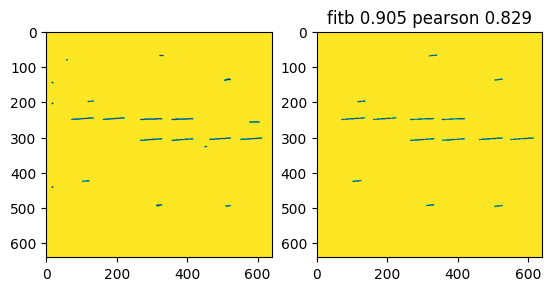

In [25]:
image = 43  # 36 - 45
class_out = 'beam'

input_img = binarize_image(cv2.imread(f'./test/input/{image}.jpg')[:,:,0], 'otsu')
output_img = binarize_image(cv2.imread(f'./test/output/{class_out}/{image}.jpg')[:,:,0], 'otsu')


plt.figure()
f, axarr = plt.subplots(1,2)
plt.title(f'fitb {round(fit_b(CGP_func_apply(input_img,chromossome), output_img),3)} pearson {round(fit_pearson(CGP_func_apply(input_img,chromossome), output_img),3)}')
axarr[0].imshow(CGP_func_apply(input_img,chromossome))
axarr[1].imshow(output_img)
plt.show()

from PIL import Image
im = Image.fromarray(CGP_func_apply(input_img,chromossome)*255)
im.save("cgp-best-beam.jpeg")

## Model Tweak

In [ ]:
input_img = binarize_image(cv2.imread('./train/input/5.jpg')[:,:,0], 'otsu')
output_img = binarize_image(cv2.imread('./train/output/note/5.jpg')[:,:,0], 'otsu')

aux = []
scores_mean = []
for epochs in [150,250,350]:
    for chromossome_len in [25,30,35]:
        for population_len in [60,75,90]:
            print("=======================================================================================")
            print(f"EPOCHS: {epochs}  CHROMOSSOME_LEN: {chromossome_len}  POPULATION_LEN: {population_len}")
            for _ in range(10):
                _, _, score = CGP_one(input_img, output_img, chromossome_len, population_len, epochs, 0.05)
                aux.append(score)
            print("========================================================================================")
            print(f'Mean: {np.mean(aux)}')
            print(f'Std: {np.std(aux)}')
            print(f'Median: {np.median(aux)}')
            aux = []

## Type of thresholding

In [ ]:
import numpy as np

CHROMOSSOME_LEN = 35
POPULATION_LEN = 75
EPOCHS = 350

aux = []

for class_ in ['note', 'beam']:
    if class_ == 'beam':
        CHROMOSSOME_LEN = 30
        POPULATION_LEN = 90
    print(f'================== {class_.upper()} ==================')
    input_img = binarize_image(cv2.imread('./train/input/5.jpg')[:,:,0], type)
    output_img = binarize_image(cv2.imread(f'./train/output/{class_}/5.jpg')[:,:,0], type)
    for type in ['otsu','normal']:
        print(f'Type => {type}')
        for _ in range(10):
            _, _, score = CGP_one(input_img, output_img, CHROMOSSOME_LEN, POPULATION_LEN, EPOCHS, 0.05)
            aux.append(score)
        print(f'Mean score -> {np.mean(aux)}')
        print(f'Std score -> {np.std(aux)}')
        print(f'Median score -> {np.median(aux)}')
        aux=[]